# Task 1: Single-particle basis

We will here discuss how to set up the single-particle basis for the Hamiltonian used by {cite}`zanghellini_2004`. We will use a one-dimensional discrete-variable representation (DVR) for our single-particle states. Specifically we will use the sinc-DVR basis by {cite}`colbert-sinc`.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

## Hamiltonian

The Hamiltonian used by {cite}`zanghellini_2004` is

$$
    H(x_1, \dots, x_n, t) = \sum_{i = 1}^{n} \left(
        -\frac{1}{2} \frac{\mathrm{d}^2}{\mathrm{d}x_i^2}
        + \frac{\Omega^2}{2} x_i^2
        + x_i \mathcal{E}_0 \sin(\omega t)
    \right)
    + \sum_{i = 1}^{n} \sum_{j = i + 1}^{n}
    \frac{1}{\sqrt{(x_i - x_j)^2 + a^2}},
$$ (eq:hamiltonian)

where we denote the time-independent one-body Hamiltonian by

$$
    h(x_i) = -\frac{1}{2} \frac{\mathrm{d}^2}{\mathrm{d}x_i^2}
    + \frac{\Omega^2}{2} x_i^2,
$$ (eq:one-body-hamiltonian)

the two-body soft Coulomb interaction by
\begin{align*}
    u(x_i, x_j) = \frac{1}{\sqrt{(x_i - x_j)^2 + a^2}},
\end{align*}
and the semi-classical monochromatic laser-field described by a  time-dependent, one-body, dipole interaction as
\begin{align*}
    h_I(x_i, t)
    = x_i \mathcal{E}_0 \sin(\omega t).
\end{align*}
As done by {cite}`zanghellini_2004` we will restrict ourselves to two-particles, i.e., $n = 2$, we use a trap frequency of $\Omega = 0.25$, and a "shielding" parameter $a = 0.25$ for the Coulomb interaction. For the laser field we use a field strength of $\mathcal{E}_0 = 1$ and a laser frequency of $\omega = 8 \Omega$.

## Definition of a one-dimensional DVR basis

According to {cite}`colbert-dvr` a definition of a one-dimensional DVR consists of four components.
They are:

1. An orthonormal basis set $B = \{\chi_i(x) \mid i = 1, \dots, K\}$, where $\chi(x)$ are real.
2. An $N$-point quadrature with the _points_ and _weights_ $Q = \{(x_i, w_i) \mid i = 1, \dots K\}$.
3. The property $\chi_i(x_k) = w_k^{-1/2} \delta_{ik}$ where $(x_k, w_k) \in Q$ and $\chi_i(x) \in B$.
4. The rule that the matrix elements of all multiplicative operators (all $\hat{x}$-dependent operators) are computed within the quadrature approximation.

The authors dub $\chi_i$ the DVR functions.
Note that even though $\chi_i(x_k) = w_k^{-1/2} \delta_{ik}$ when $(x_k,
w_k) \in Q$, $\chi_i(x)$  is not necessarily zero for all values of $x$.
That is, the basis functions does not have to be everywhere zero except for
at the quadrature points.
They are however orthogonal at the quadrature points as stated by property
3 above.
Property 4 is given mathematically as
\begin{align*}
    \langle \chi_i | \hat{v}(x) | \chi_j \rangle
    \approx \sum_{k = 1}^{K} w_k \chi_i(x_k) v(x_k) \chi_j(x_k)
    = \sum_{k = 1}^{K} \frac{w_k}{\sqrt{w_i w_j}} \delta_{ik} \delta_{jk} v(x_k)
    = \delta_{ij} v(x_j),
\end{align*}
that is, the matrix elements of the potential operator (with only $\hat{x}$-dependent operators) is the potential evaluated at the quadrature points, and it is diagonal.

## Sinc-DVR basis

The specific DVR-basis we will be using is the sinc-DVR by {cite}`colbert-sinc`. The basis set is then $B = \{\chi_i(x) \mid i = 1, \dots, K\}$ with the basis functions defined as
\begin{align*}
    \chi_i(x) = \frac{1}{\sqrt{\delta x}} \mathrm{sinc}\!\left(
    \frac{x - x_i}{\delta x}
    \right),
\end{align*}
where the $\mathrm{sinc}(x)$-function is given by
\begin{align*}
    \mathrm{sinc}(x) = \begin{cases}
        \frac{\sin(\pi x)}{\pi x}, & x \neq 0, \\
        \quad 1, & x = 0.
    \end{cases}
\end{align*}
The quadrature for this basis is $Q = \{(x_0 + i\delta x, \delta x) \mid i = 1, \dots, K\}$, that is, a uniform grid  with equal weights, $x_i = x_0 + i \delta x$ with $x_0$ an arbitrary starting point, and all weights the same $\delta x$.

In [30]:
# Class defining a sinc-DVR single-particle function
class SincDVR:
    def __init__(self, x_i, dx):
        self.x_i = x_i
        self.dx = dx

    def __call__(self, x):
        return np.sinc((x - self.x_i) / self.dx) / np.sqrt(self.dx)

In [32]:
dx = 0.2  # Grid-spacing
x_min = -5  # Left-most side of the simulation box
x_max = 5
num_dvr = int((x_max - x_min) / dx) + 1  # Number of DVR-states

grid = np.linspace(x_min, x_max, num_dvr)  # The uniform quadrature grid
B = [SincDVR(x_i, dx) for x_i in grid]  # List of callable sinc-DVR functions

Below we demonstrate what the sinc-DVR functions look like, both on the grid (where they are Kronecker-Deltas) and on a more refined grid.

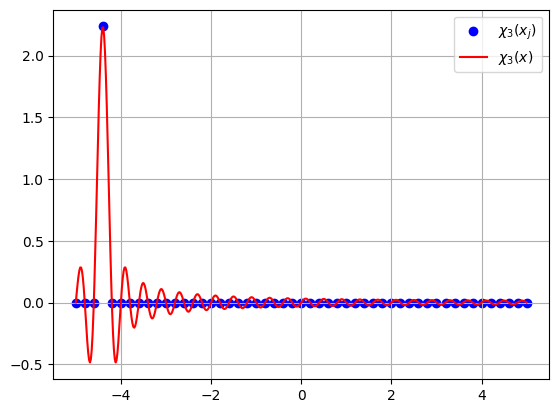

In [36]:
plt.scatter(grid, B[3](grid), color="b", label=r"$\chi_3(x_j)$")
plt.plot(
    (x := np.linspace(x_min, x_max, num_dvr * 10)),
    B[3](x),
    color="r",
    label=r"$\chi_3(x)$",
)
plt.grid()
plt.legend()
plt.show()

Here $\chi_3(x)$ is the sinc-DVR function on a more refined grid, and $\chi_3(x_j)$ denotes the same function evaluated only at the grid points.

### Matrix elements of the Hamiltonian

We will be needing both one-body and two-body matrix elements from the Hamiltonian shown in equation {eq}`eq:hamiltonian`. The kinetic energy matrix elements for the sinc-DVR can be found in equation (A7) in {cite}`colbert-sinc`. They are
\begin{align*}
    \langle \chi_i | -\frac{1}{2} \frac{\mathrm{d}^2}{\mathrm{d} x^2} | \chi_j \rangle
    = \begin{cases}
        \frac{\pi^2}{6 (\delta x)^2}, & i = j, \\
        \frac{(-1)^{i - j}}{(\delta x)^2 (i - j)^2}, & i \neq j.
    \end{cases}
\end{align*}
The remaining terms can be evaluated using the quadrature rule. For example, the matrix elements of the harmonic oscillator potential (or only the operator part) are
\begin{align*}
    \langle \chi_i | \hat{x}^2 | \chi_j \rangle
    \approx \delta_{ij} x_j^2.
\end{align*}
For the two-body Coulomb interaction there are two integrals which can both be solved using the quadrature rule.
That is (note which position in the bras and the kets are pairwise integrated),

$$
    \langle \chi_i \chi_j | \hat{u}(x_1, x_2) | \chi_k \chi_l \rangle
    = \int \mathrm{d} x \mathrm{d} y \frac{\chi_i(x) \chi_j(y) \chi_k(x) \chi_l(y)}{\sqrt{(x - y)^2 + a^2}}
    \approx \delta_{ik} \delta_{jl} u(x_k, x_l).
$$ (eq:task-1-quadrature-two-body)

```{note}
Show how the quadrature rule can be used twice to get the expression in equation {eq}`eq:task-1-quadrature-two-body`.
```

```{note}
Set up the matrix elements needed for the Hamiltonian in equation {eq}`eq:hamiltonian`.
```

```{admonition} Tip
:class: tip
Once you have set up the matrix elements of the one-body Hamiltonian from equation {eq}`eq:one-body-hamiltonian` you can check that the setup has been done correctly. The eigenvalues of the one-body Hamiltonian should correspond to the eigenvalues of a one-dimensional harmonic oscillator (see {cite}`griffiths2010introduction` chapter 2.3) (if they differ by much you might need to increase the number of basis functions, and it might be that only the lowest eigenvalues are correct).
```